In [1]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())


E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [2]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy


C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 1. PPT-RE-Baseflow

In [3]:
import scienceplots
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
mdl=5

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values

data = ['Pre-monsoon','Monsoon','Post-monsoon','Winter']
df_re = pd.DataFrame(columns=data,index=basin)
df_re = df_re.apply(pd.to_numeric, errors='coerce')

df_ppt = pd.DataFrame(columns=data,index=basin)
df_ppt = df_re.apply(pd.to_numeric, errors='coerce')

df_base = pd.DataFrame(columns=data,index=basin)
df_base = df_re.apply(pd.to_numeric, errors='coerce')


rb_ratio=ds_RM['Qs_tavg']/ds_RM['Qsb_tavg']

In [10]:
import scienceplots
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
mdl=5

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values

data = ['Pre-monsoon','Monsoon','Post-monsoon','Winter']
df_re = pd.DataFrame(columns=data,index=basin)
df_re = df_re.apply(pd.to_numeric, errors='coerce')

df_ppt = pd.DataFrame(columns=data,index=basin)
df_ppt = df_re.apply(pd.to_numeric, errors='coerce')

df_base = pd.DataFrame(columns=data,index=basin)
df_base = df_re.apply(pd.to_numeric, errors='coerce')


for i, Reg in enumerate(basin):

    plt.style.use(['science','no-latex','bright'])

    #df_box[Reg]=re1TotalPrecip_tavg
    df_re.iloc[i,:] = [ds_RM['RE_cleaned'].isel(region=i, season=j).mean().compute().values for j in range(4)]
    df_ppt.iloc[i,:] = [ds_RM['TotalPrecip_tavg'].isel(region=i, season=j).mean().compute().values for j in range(4)]
    df_base.iloc[i,:] = [ds_RM['Qsb_tavg'].isel(region=i, season=j).mean().compute().values for j in range(4)]


#Box plot of values
# Plotting bar plot with increased size
fig, ax = plt.subplots(figsize=(20, 17),nrows=3,gridspec_kw={'hspace': 0.05},dpi=600)  # Increased size

cmap = plt.cm.get_cmap('Reds', 4)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(4)] 

df_re.plot.bar(rot=45, ax=ax[0],color= colors,width=0.6,edgecolor='black')
[x.set_linewidth(1.45) for x in ax[0].spines.values()]
ax[0].grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
ax[0].set_ylim(0,0.4)
ax[0].text(0.025, 0.94,'a)',fontsize=26.6,color='black',weight='bold',transform=ax[0].transAxes,ha='center', va='center')


#ax[1].invert_yaxis() 
df_ppt.plot.bar(rot=45, ax=ax[1],color= colors,width=0.6,edgecolor='black')
[x.set_linewidth(1.45) for x in ax[1].spines.values()]
ax[1].grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
ax[1].set_ylim(0,500)
ax[1].text(0.025, 0.94,'b)',fontsize=26.6,color='black',weight='bold',transform=ax[1].transAxes,ha='center', va='center')


df_base.plot.bar(rot=45, ax=ax[2],color= colors,width=0.6,edgecolor='black')
[x.set_linewidth(1.45) for x in ax[2].spines.values()]
ax[2].grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
ax[2].set_ylim(0,180)
ax[2].text(0.025, 0.94,'c)',fontsize=26.6,color='black',weight='bold',transform=ax[2].transAxes,ha='center', va='center')




#ax.set_title('Bar Plot of RE Values by Basin',fontsize=17)
#ax[1].set_xlabel('Basins',fontsize=31)
ax[0].set_ylabel('Runoff efficiency',fontsize=30.5,labelpad=17)
ax[1].set_ylabel('Precipitation',fontsize=30.5,labelpad=17)
ax[2].set_ylabel('Baseflow ',fontsize=30.5,labelpad=17)



ax[0].yaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=26.5) 
ax[0].xaxis.set_tick_params(which='both', left=True, right=False,labelbottom=False,labelsize=28)
ax[1].yaxis.set_tick_params(which='both', left=True, right=False,labelsize=26.5)
ax[1].xaxis.set_tick_params(which='both', left=True, right=False,labelbottom=False,labelsize=25.5)
ax[2].yaxis.set_tick_params(which='both', left=True, right=False,labelsize=26.5)
ax[2].xaxis.set_tick_params(which='both', left=True, right=False,labelsize=28)


ax[0].legend(loc='upper right', bbox_to_anchor=(0.90, 1),title_fontsize=30,ncol=4,fontsize=24)
ax[1].legend().remove()
ax[2].legend().remove()

plt.tight_layout()
plt.savefig('2_RE analysis/2_Factors/Outputs/RE_ppt_Qbas.jpeg',dpi=600)

C:\Users\sstar\AppData\Local\Temp\ipykernel_18212\1364034129.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 4)  # Choose a colormap and number of colors
C:\Users\sstar\AppData\Local\Temp\ipykernel_18212\1364034129.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


## 2 RE analysis over a fixed range of precipitation

C:\Users\sstar\AppData\Local\Temp\ipykernel_18212\1669166537.py:31: RuntimeWarning: Mean of empty slice.
  df.iloc[i,2]=re1[2].mean()
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\sstar\AppData\Local\Temp\ipykernel_18212\1669166537.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors


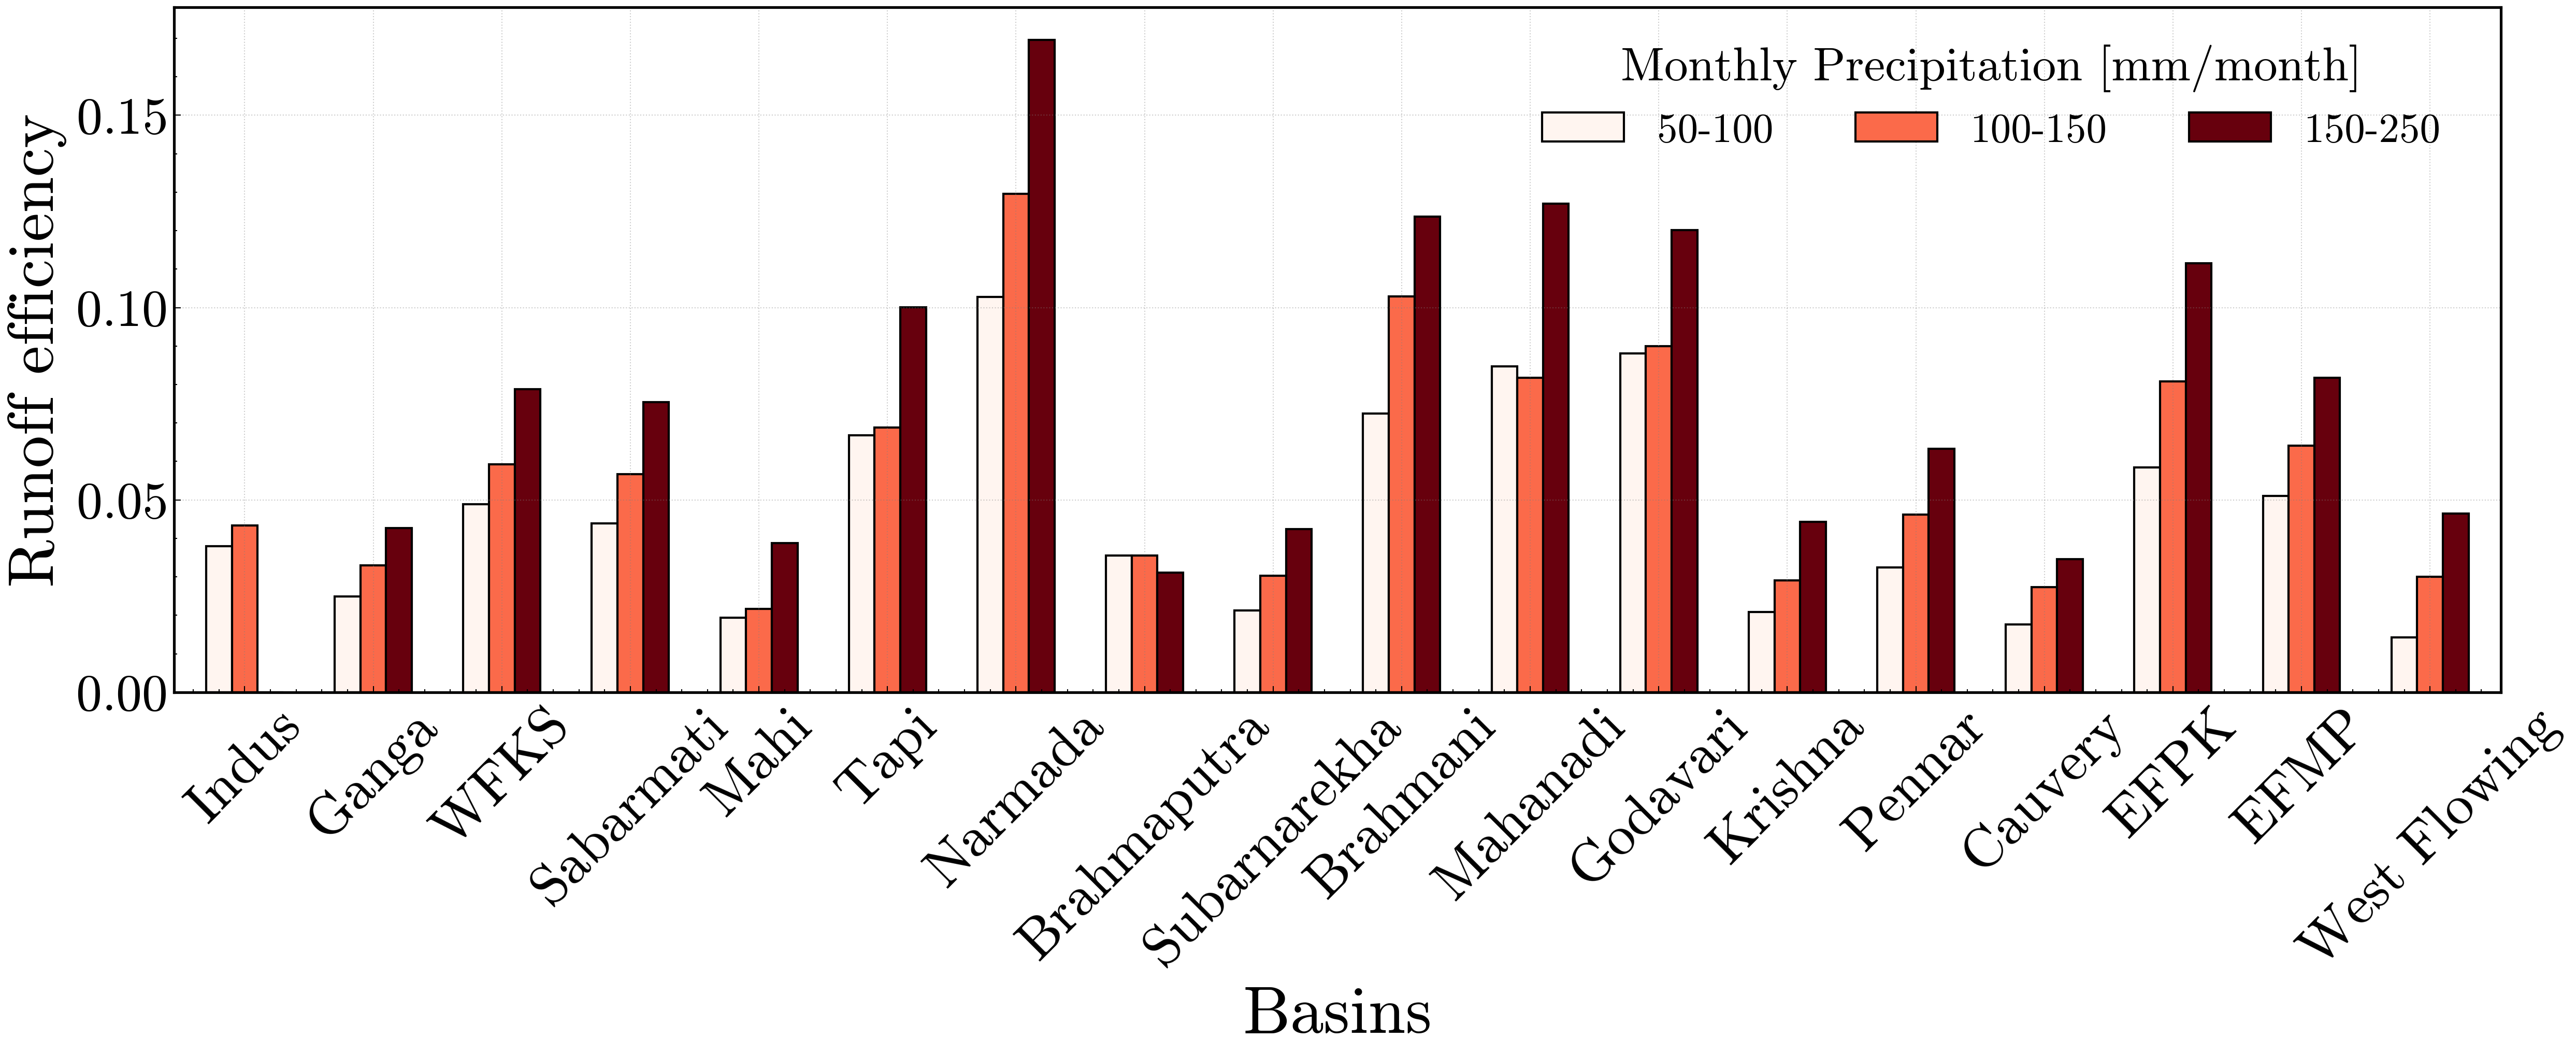

In [9]:
import scienceplots
plt.style.use(['science','no-latex','bright'])
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
mdl=5

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values

p_rng=[[50,100],[100,150],[150,250]]
data = ['50-100','100-150','150-250']
df = pd.DataFrame(columns=data,index=basin)
df_box=pd.DataFrame(columns=basin)


for i, Reg in enumerate(basin):

    #plt.style.use(['science','no-latex','bright'])

    ppt=ds_RM['TotalPrecip_tavg'].isel(region=i).compute().values
    re=ds_RM['RE'].isel(region=i).compute().values
    #re=ds_RM['SoilMoist_tavg'].isel(region=i).mean(dim='SoilMoist_profiles').compute().values
    re1=[]
    for j in range(3):
        idx=(ppt>p_rng[j][0]) & (ppt<p_rng[j][1])
        re1.append(re[idx])

    #df_box[Reg]=re1
    df.iloc[i,0]=re1[0].mean()
    df.iloc[i,1]=re1[1].mean()
    df.iloc[i,2]=re1[2].mean()
    


#Box plot of values
# Plotting bar plot with increased size
fig, ax = plt.subplots(figsize=(17, 7),dpi=300)  # Increased size

cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(3)] 
df.plot.bar(rot=45, ax=ax,color= colors,width=0.6,edgecolor='black')

[x.set_linewidth(1.25) for x in ax.spines.values()]
ax.grid(True, color= 'grey', alpha=0.4, linestyle='dotted')


#ax.set_title('Bar Plot of RE Values by Basin',fontsize=17)
ax.set_xlabel('Basins',fontsize=31)
ax.set_ylabel('Runoff efficiency',fontsize=30)
ax.yaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=24) 
ax.xaxis.set_tick_params(which='both', left=True, right=False,labelsize=26)

ax.legend(loc='upper right', bbox_to_anchor=(0.99, 1),title='Monthly Precipitation [mm/month]',title_fontsize=22,ncol=3,fontsize=19)

plt.tight_layout()
plt.savefig('2_RE analysis/2_Factors/Outputs/RE_fixedppt.jpeg',dpi=600)

## 3 RE correlation With Soil Moisture

#### Seasonal

C:\Users\sstar\AppData\Local\Temp\ipykernel_30324\2551826490.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors


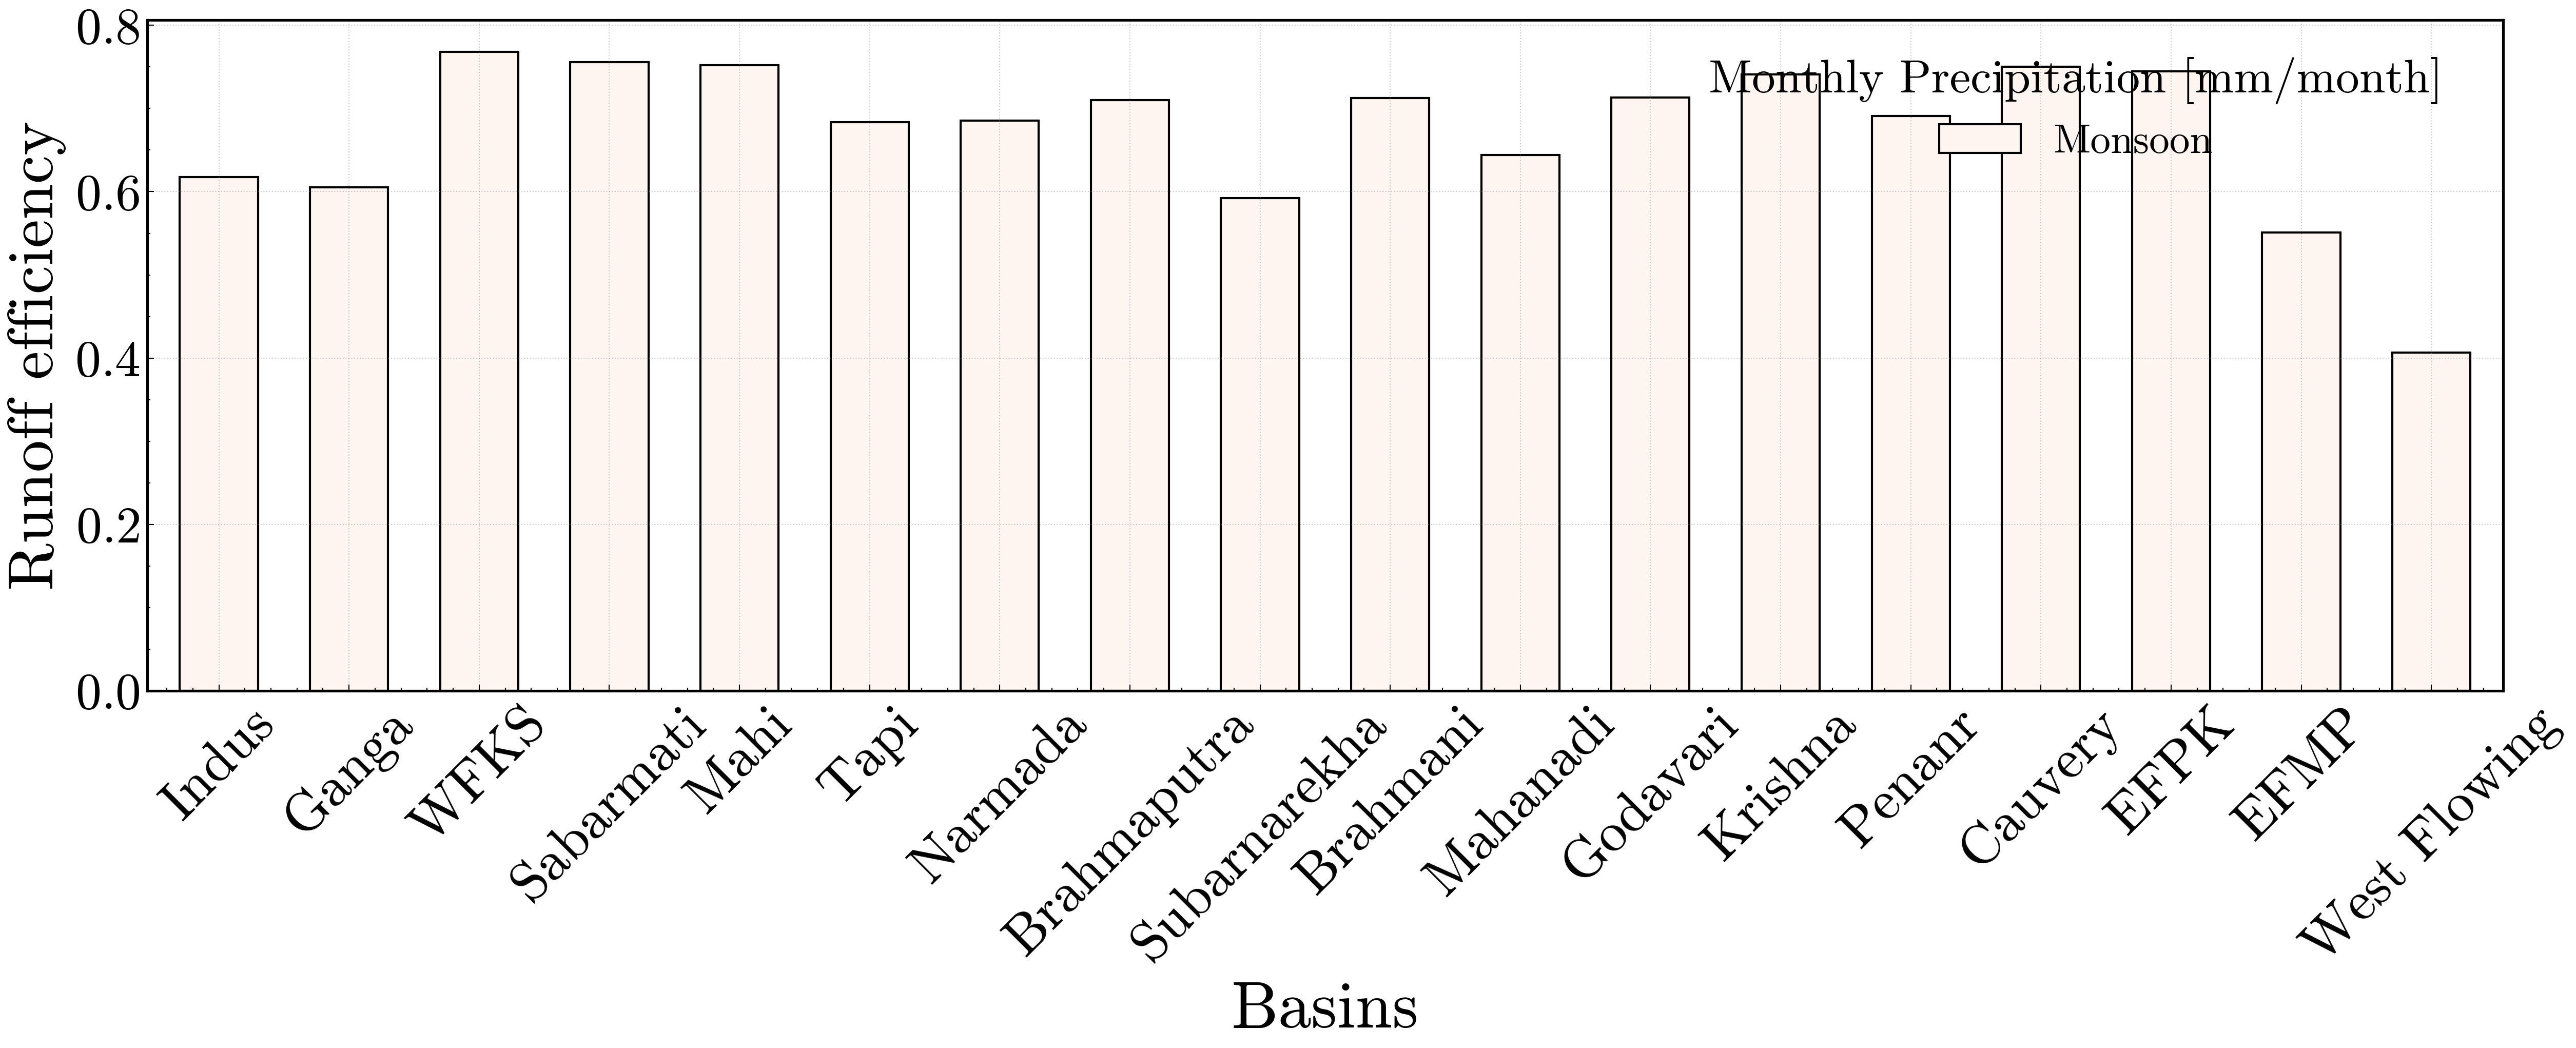

In [10]:
mdl=5
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
#ssn = ['Pre-monsoon','Monsoon','Post-monsoon','Winter']
ssn = ['Monsoon']

ds_RM = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values

df = pd.DataFrame(columns=ssn,index=basin)

for i, Reg in enumerate(basin):
   

    ppt=ds_RM['RE_cleaned'].isel(region=i,season=1).compute().values
    SM=ds_RM['SoilMoist_tavg'].isel(region=i,season=1).compute().values
    #df[i,:] = [ds_RM['TotalPrecip_tavg'].isel(region=i, season=j).mean().compute().values for j in range(4)]
    df.iloc[i,0] = np.corrcoef(ppt,SM)[0,1]


#Box plot of values
import scienceplots
#plt.style.use(['science','no-latex','bright'])
# Plotting bar plot with increased size
fig, ax = plt.subplots(figsize=(17, 7),dpi=300)  # Increased size

cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(3)] 
df.plot.bar(rot=45, ax=ax,color= colors,width=0.6,edgecolor='black')

[x.set_linewidth(1.25) for x in ax.spines.values()]
ax.grid(True, color= 'grey', alpha=0.4, linestyle='dotted')


#ax.set_title('Bar Plot of RE Values by Basin',fontsize=17)
ax.set_xlabel('Basins',fontsize=31)
ax.set_ylabel('Runoff efficiency',fontsize=30)
ax.yaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=24) 
ax.xaxis.set_tick_params(which='both', left=True, right=False,labelsize=26)

ax.legend(loc='upper right', bbox_to_anchor=(0.99, 1),title='Monthly Precipitation [mm/month]',title_fontsize=22,ncol=3,fontsize=19)

plt.tight_layout()
#plt.savefig('2_RE analysis/1_mean_var/outputs/RE_fixedppt.jpeg')


#### all

C:\Users\sstar\AppData\Local\Temp\ipykernel_16088\3612058797.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors


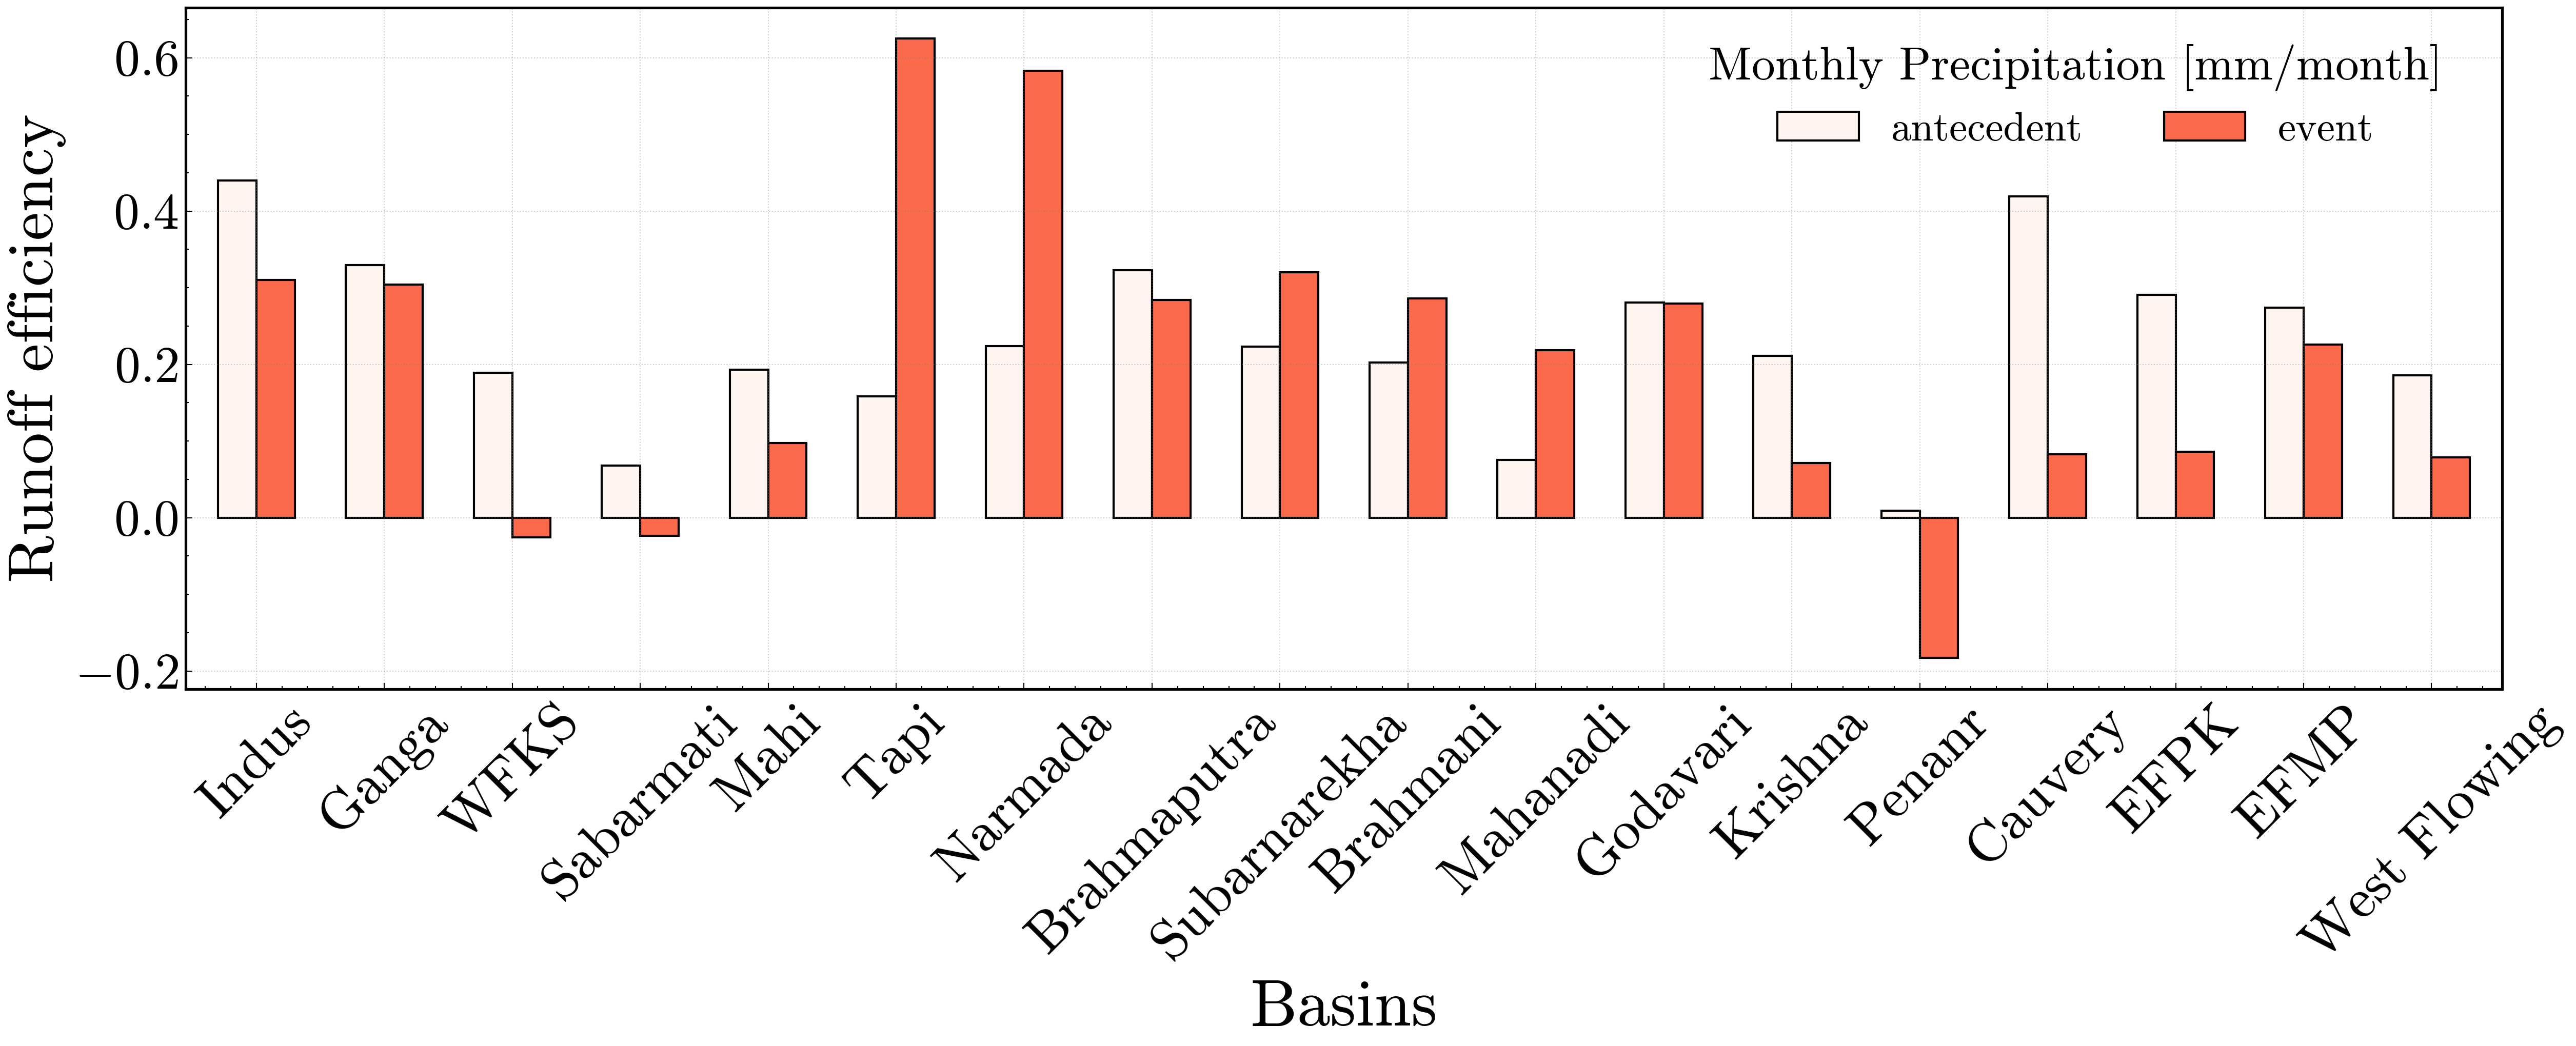

In [193]:
mdl=5
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']

col=['antecedent','event']

#load RE
ds = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds.region.values
df = pd.DataFrame(columns=col,index=basin)


rng2=[4]
rng1=[3]

for i, reg in enumerate(basin):
   
    re=ds['RE_cleaned'].sel(region=reg,time=ds['time.month'].isin(rng2)).compute().values
    ppt=ds['TotalPrecip_tavg'].sel(region=reg,time=ds['time.month'].isin(rng2)).compute().values
    ppt1=ds['TotalPrecip_tavg'].sel(region=reg,time=ds['time.month'].isin(rng1)).compute().values
    
    #SM=ds['SoilMoist_tavg'].sel(region=reg,time=ds['time.month'].isin(rng2)).compute().values
    SM1=ds['SoilMoist_tavg'].sel(region=reg,time=ds['time.month'].isin(rng1)).compute().values
    
    df.iloc[i,0] = np.corrcoef(re,SM1)[0,1]
    df.iloc[i,1] = np.corrcoef(re,ppt1)[0,1]

#Box plot of values
import scienceplots
#plt.style.use(['science','no-latex','bright'])
# Plotting bar plot with increased size
fig, ax = plt.subplots(figsize=(17, 7),dpi=300)  # Increased size

cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(3)] 
df.plot.bar(rot=45, ax=ax,color= colors,width=0.6,edgecolor='black')

[x.set_linewidth(1.25) for x in ax.spines.values()]
ax.grid(True, color= 'grey', alpha=0.4, linestyle='dotted')


#ax.set_title('Bar Plot of RE Values by Basin',fontsize=17)
ax.set_xlabel('Basins',fontsize=31)
ax.set_ylabel('Runoff efficiency',fontsize=30)
ax.yaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=24) 
ax.xaxis.set_tick_params(which='both', left=True, right=False,labelsize=26)

ax.legend(loc='upper right', bbox_to_anchor=(0.99, 1),title='Monthly Precipitation [mm/month]',title_fontsize=22,ncol=3,fontsize=19)

plt.tight_layout()

C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


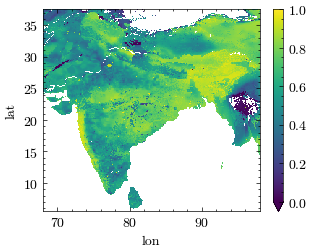

In [83]:
mdl=5
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']

#load RE
ds = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_grid_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

### Load Soil Moisture
ds = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_grid_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
#ds=ds.mean(dim='SoilMoist_profiles')
ds_SM=ds['SoilMoist_tavg']/(60*60*24*30)  #we multplied all the variables to converted to mm/month. But SM unit is different, m3/m3, it shouldn't be treated like that
ds_SM=ds_SM.compute()

xr.corr(ds['Qsb_tavg'], ds_SM, dim='time').plot(vmin=0,vmax=1)
#xr.corr(ds['RE'], ds['TotalPrecip_tavg'], dim='time').plot(vmin=0,vmax=1)

In [32]:
ds['TotalPrecip_tavg'].shift(time=1).isel(lat=129,lon=100).compute()

<xarray.DataArray 'TotalPrecip_tavg' (time: 504)> Size: 4kB
array([           nan, 0.00000000e+00, 0.00000000e+00, 1.28647480e+01,
       1.77212724e+01, 9.20007433e-01, 2.94434597e+02, 1.16214342e+02,
       1.65335696e+02, 1.43113629e+02, 0.00000000e+00, 0.00000000e+00,
       3.82219908e+00, 9.40605616e+00, 0.00000000e+00, 1.42580119e+01,
       7.64817219e+00, 1.89883914e+01, 1.04152709e+02, 2.38850367e+02,
       2.39762233e+02, 2.19479355e+02, 2.89525809e+01, 0.00000000e+00,
       0.00000000e+00, 6.44709794e+00, 0.00000000e+00, 1.57974376e+00,
       7.51312234e+00, 9.13926379e+00, 7.11897377e+01, 2.48092116e+02,
       9.53414716e+01, 1.03610250e+02, 1.68491978e+02, 5.60938330e+00,
       0.00000000e+00, 0.00000000e+00, 8.37703677e-01, 0.00000000e+00,
       1.75326867e+00, 9.40408339e+00, 8.02715585e+01, 3.22497171e+02,
       5.97272652e+02, 2.82883263e+02, 2.08361339e+02, 2.50944986e+00,
       6.05587141e+00, 1.04570756e-01, 2.51390008e+00, 0.00000000e+00,
       1.79296104e+00, 0.00000000e+00, 9.43289027e+01, 3.19414120e+02,
       1.02439739e+02, 1.09572953e+02, 2.76607371e+02, 0.00000000e+00,
       0.00000000e+00, 1.13794462e+01, 0.00000000e+00, 8.96148101e+00,
       1.54425972e+01, 2.76036134e+00, 2.32170682e+02, 2.21368218e+02,
       1.30335452e+02, 3.88128870e+01, 6.68215140e+01, 0.00000000e+00,
       6.19016746e+00, 3.10205955e+01, 5.86065543e+01, 0.00000000e+00,
       1.52584647e+01, 2.26287691e+01, 1.00586298e+02, 2.43639803e+02,
...
       9.68609821e+01, 1.59622971e+01, 1.43750538e+02, 8.01112513e+01,
       1.87721947e+02, 7.86165612e+01, 2.95396696e+01, 0.00000000e+00,
       1.17685275e+00, 1.72284009e-01, 1.49300480e-01, 1.51023842e+01,
       1.03031701e+01, 3.31124966e+01, 2.00878771e+02, 2.69382331e+02,
       1.45448966e+02, 5.38793451e+02, 6.75116490e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.18489419e+01,
       0.00000000e+00, 1.30065643e+01, 1.88427593e+02, 1.51221204e+02,
       2.93281456e+02, 6.66413523e+01, 1.33533992e+02, 6.77574928e+00,
       0.00000000e+00, 0.00000000e+00, 9.07189984e-01, 3.69189034e+00,
       4.59958695e+00, 2.79457760e+01, 2.05154661e+02, 1.86750716e+02,
       3.40705103e+02, 9.28940763e+01, 2.01140778e+01, 0.00000000e+00,
       7.57940307e+00, 2.14743559e+00, 3.92956136e+00, 0.00000000e+00,
       1.47620951e+00, 4.50267352e+00, 1.51842788e+02, 3.24472432e+02,
       2.99775966e+02, 4.08532331e+02, 1.86891219e+02, 1.04065036e+01,
       1.79115098e-01, 2.68503089e+01, 6.13774899e+00, 2.12610926e+01,
       1.67683976e+01, 2.32056644e+01, 1.94985147e+02, 1.66550045e+02,
       3.56184799e+02, 2.11780021e+02, 1.04692548e+02, 0.00000000e+00,
       0.00000000e+00, 6.96908914e+00, 4.31929765e-01, 0.00000000e+00,
       9.76325035e+00, 7.58053216e+01, 2.87590341e+02, 4.59474292e+02,
       2.15212390e+02, 3.67208212e+02, 4.76859208e+01, 4.46173066e+01])
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-31 1980-02-29 ... 2021-12-31
    lat      float64 8B 18.45
    lon      float64 8B 78.05